In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import itertools
# import seaborn as sb

In [41]:
import matplotlib
matplotlib.__version__

'3.1.1'

In [79]:
def AckleyProblem(xs):
    a = np.exp(-0.2 * np.sqrt(1./len(xs) * np.square(np.linalg.norm(xs, axis=0))))
    b = - np.exp(1./len(xs) * np.sum(np.cos(2*np.pi*xs), axis=0))
    return -20 * a + b + 20 + np.exp(1)

def GradAckleyProblem(xs):
    """del H/del xi = -20 * -0.2 * xi / sqrt(1/n sum_j xj) * a + 2 pi sin(2 pi xi)/n * b"""
    a = np.exp(-0.2 * np.sqrt(1./len(xs) * np.square(np.linalg.norm(xs, axis=0))))
    b = - np.exp(1./len(xs) * np.sum(np.cos(2*np.pi*xs), axis=0))
    a_p = -0.2 * xs / np.sqrt(1./len(xs) * np.square(np.linalg.norm(xs, axis=0)))
    b_p = 2 * np.pi * np.sin(2 * np.pi * xs)/len(xs)
    return np.nan_to_num(-20 * a_p * a + b_p * b) # only when norm(x) == 0 do we have nan and we know the grad is zero there
    

In [193]:
def grad_descent(func, grad_func, x_curr, eps,gamma):
    x_curr = np.array(x_curr, dtype=np.float)
    path = [x_curr]
    t = 0
    while True:
        x_next = x_curr - gamma(t)*grad_func(x_curr)
        path.append(x_next)
        
        if np.abs(func(x_next) - func(x_curr)) < eps:
            break
        x_curr = x_next
        t += 1
    return path     

In [198]:
def gamma(t):
    return 0.5/((t // 20) + 1)

path = grad_descent(AckleyProblem, GradAckleyProblem, [[[1.]], [[2.]]], 0.00001, gamma)

In [199]:
path_x, path_y = np.concatenate(path, axis=2)

inp_path = np.array([path_x[0], path_y[0]])

out_path = AckleyProblem(inp_path)

In [200]:
# xs = np.linspace(-100, 1000, 10000)
# ys = np.linspace(-100, 1000, 10000)

xs = np.linspace(-2, 2, 200)
ys = np.linspace(-2, 2, 200)

inp = np.array(np.meshgrid(xs, ys))
out = AckleyProblem(inp)


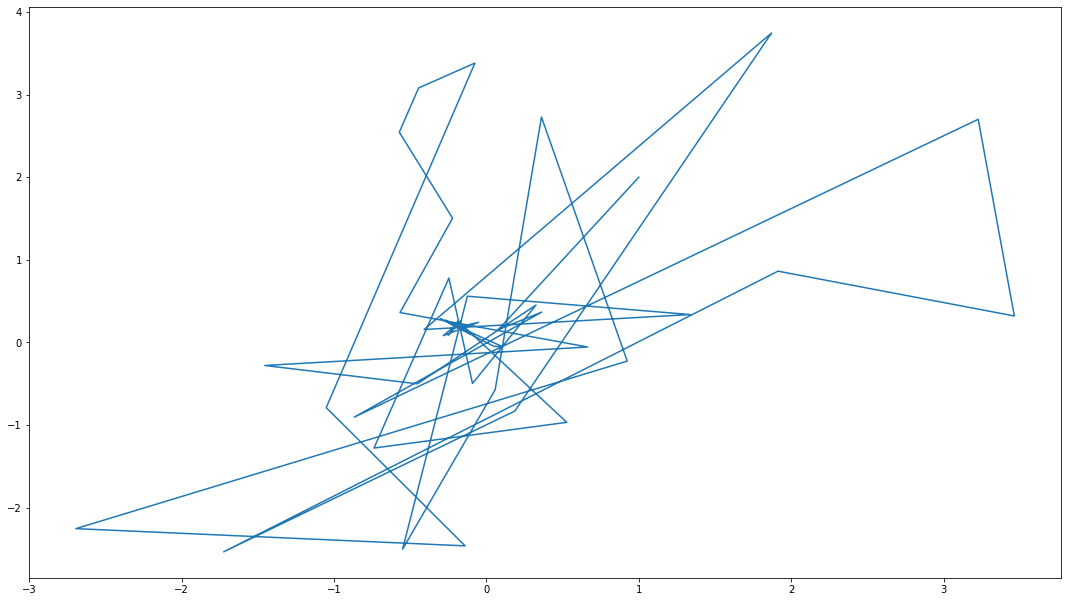

In [201]:

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

plt.plot(path_x[0], path_y[0])
plt.show()

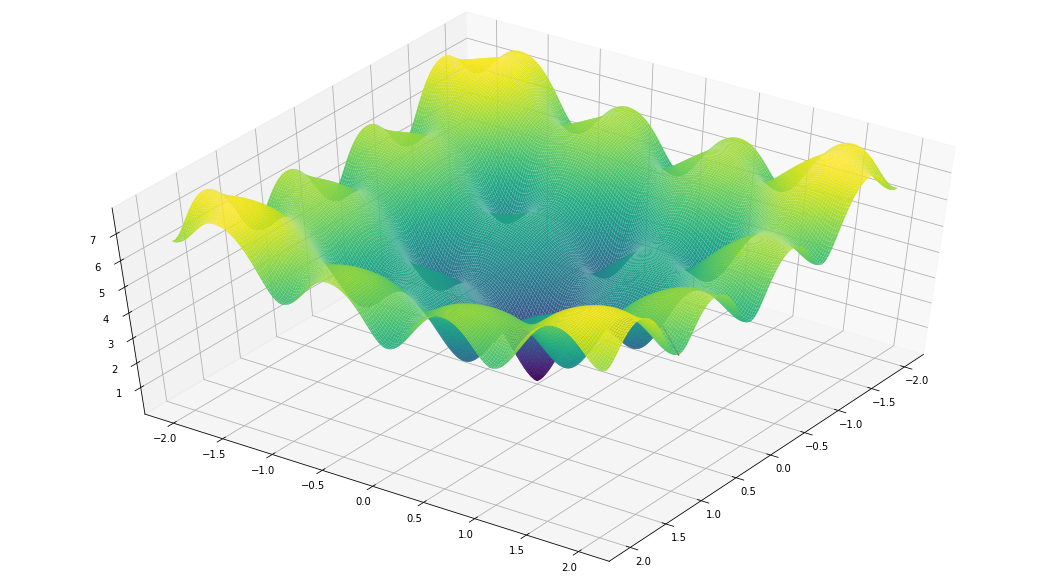

In [175]:

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax = fig.gca(projection='3d')

ax.view_init(50, 35)

ax.plot_surface(inp[0], inp[1], out, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.plot3D(path_x[0], path_y[0], out_path, 'red')


# plt.imshow(out, cmap='hot', interpolation='nearest')
# plt.show()